In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image, ExifTags
import datetime as dt
import pandas as pd
from lxml import etree
%matplotlib inline

# This is where the elements of the xml (gpx) file are defined
namespace = {'def': 'http://www.topografix.com/GPX/1/1'}

['E:\\2017-06-12_Duck_UAS\\gpx\\f1.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f10.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f11.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f12.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f13.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f14.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f15.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f16.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f17.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f18.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f2.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f20.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f21.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f22.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f23.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f24.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f25.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f26.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f3.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f4.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f5.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f6.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f7.gpx', 'E:\\2017-06-12_Duck_UAS\\gpx\\f8.gpx', 'E:\\2017-06-12_Duck_UA

C:\Users\csherwood\AppData\Local\Continuum\Anaconda\envs\IOOS3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


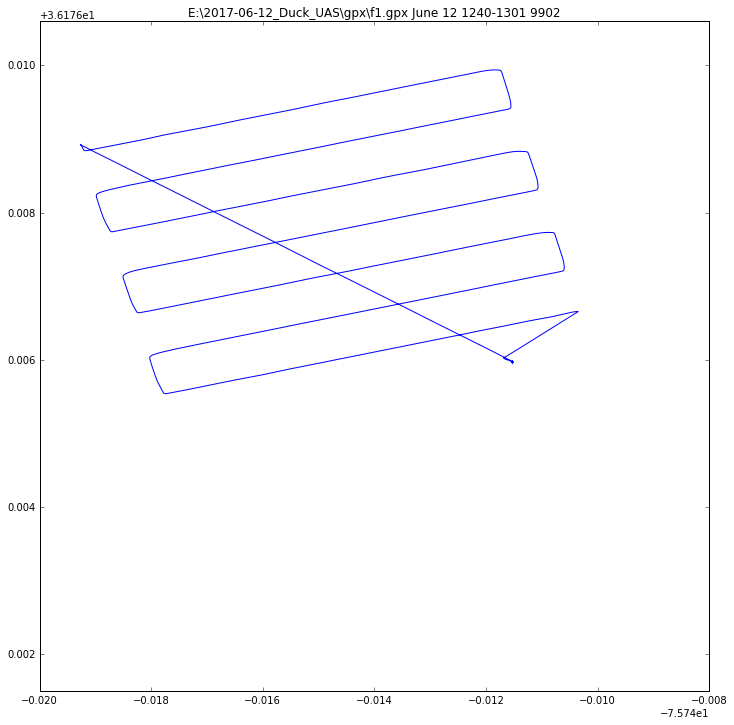

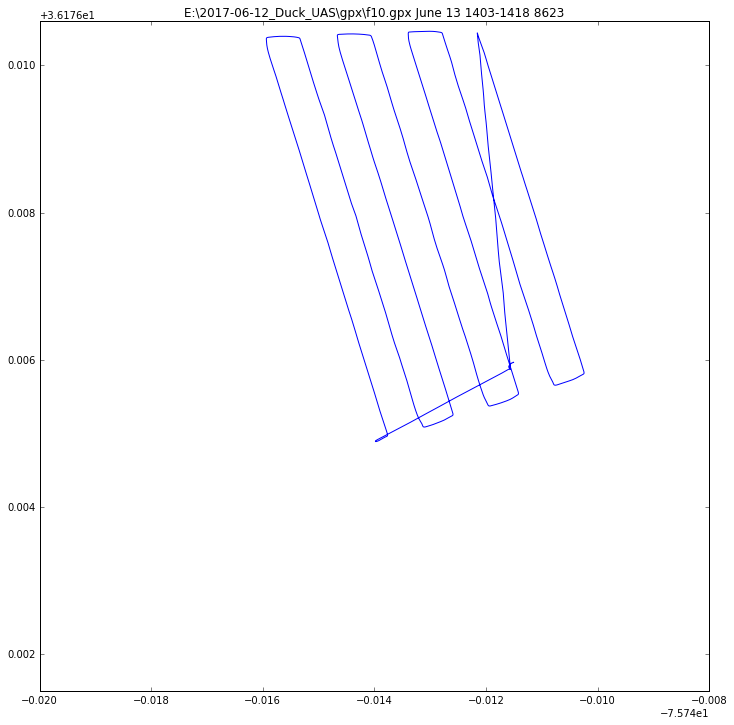

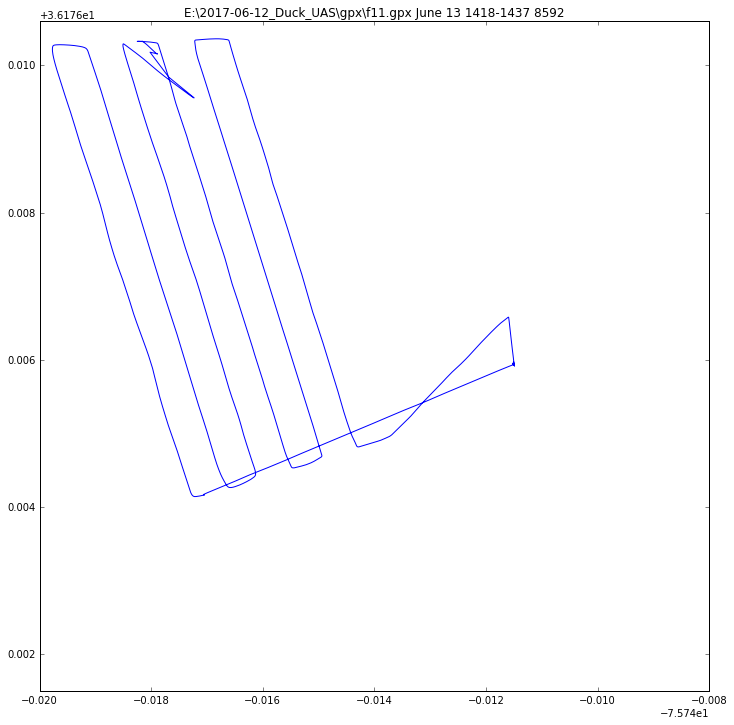

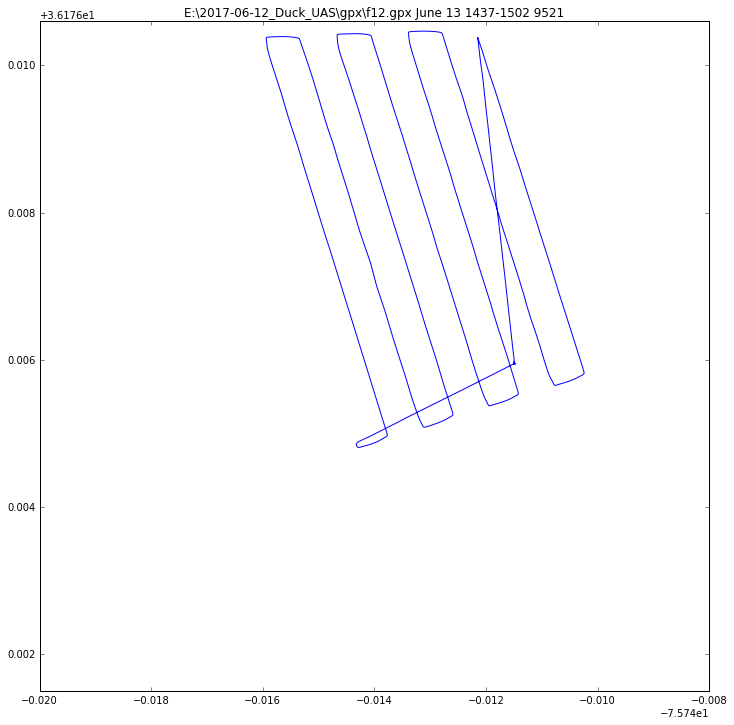

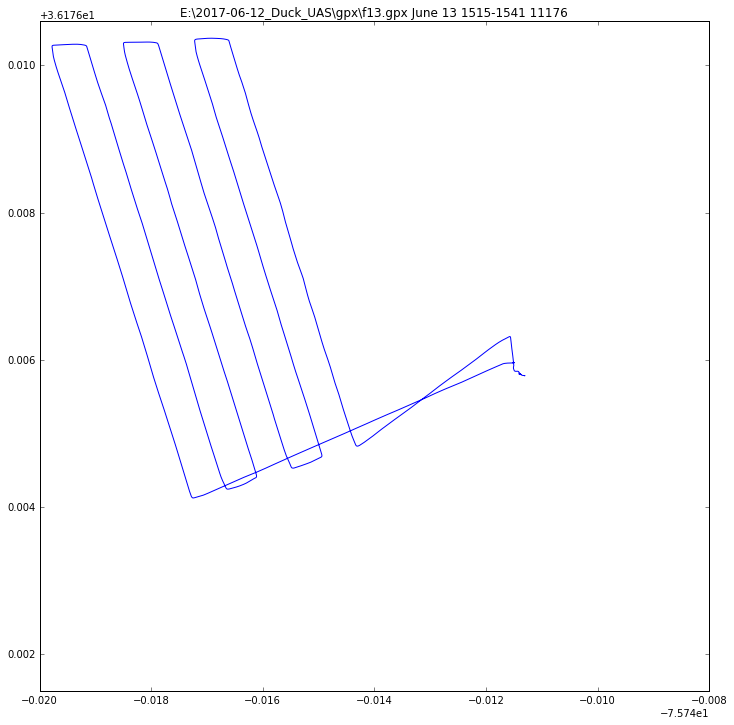

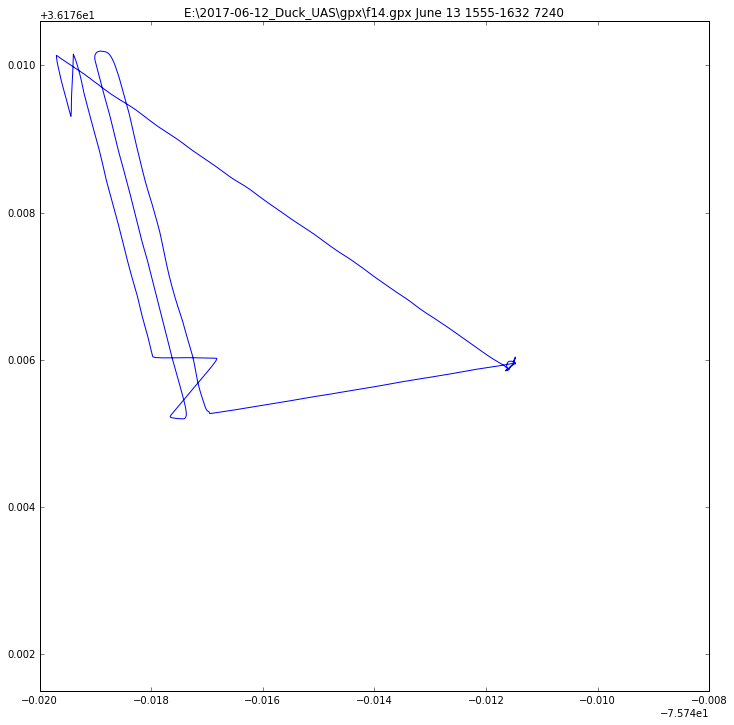

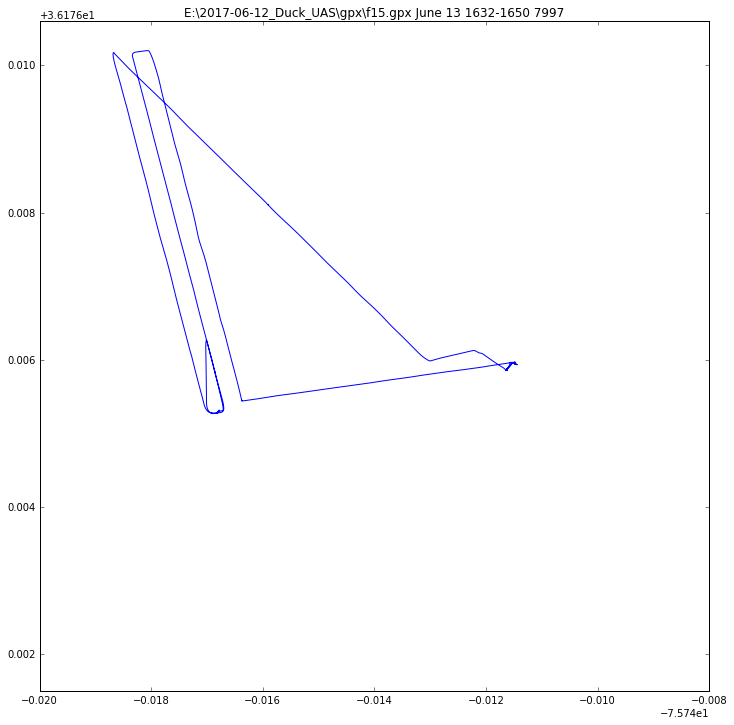

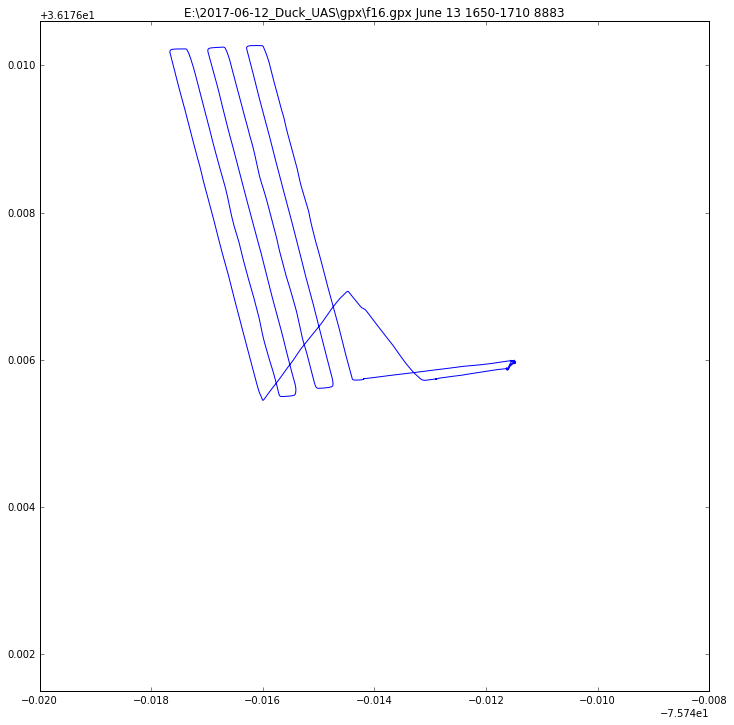

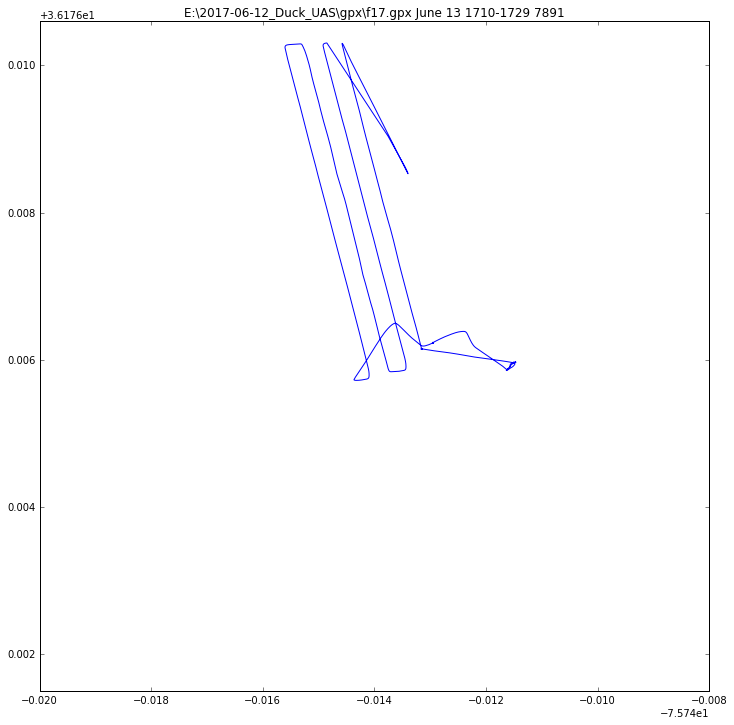

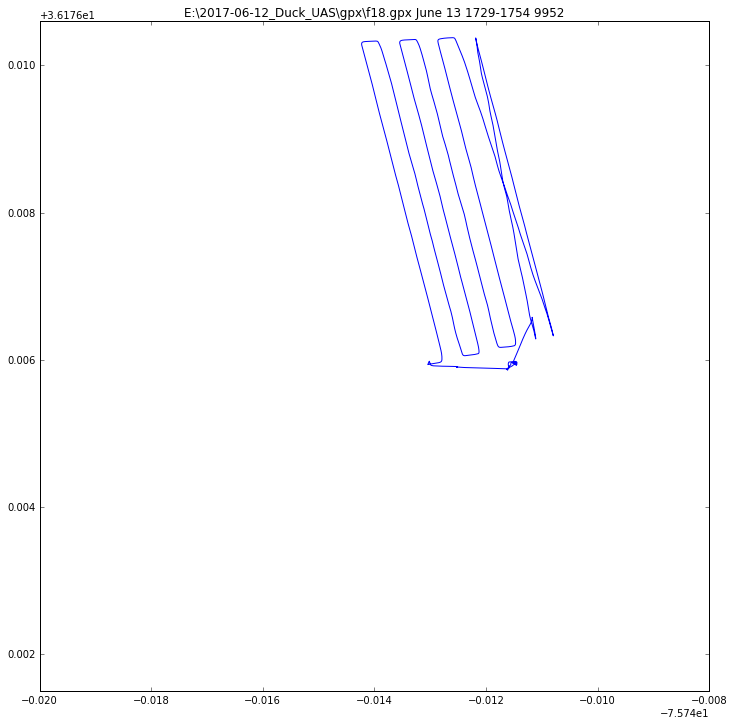

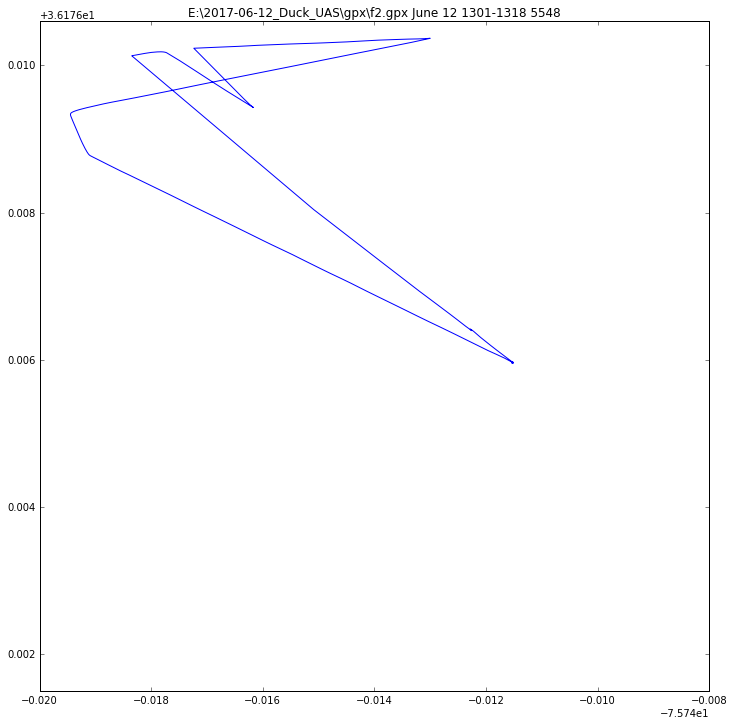

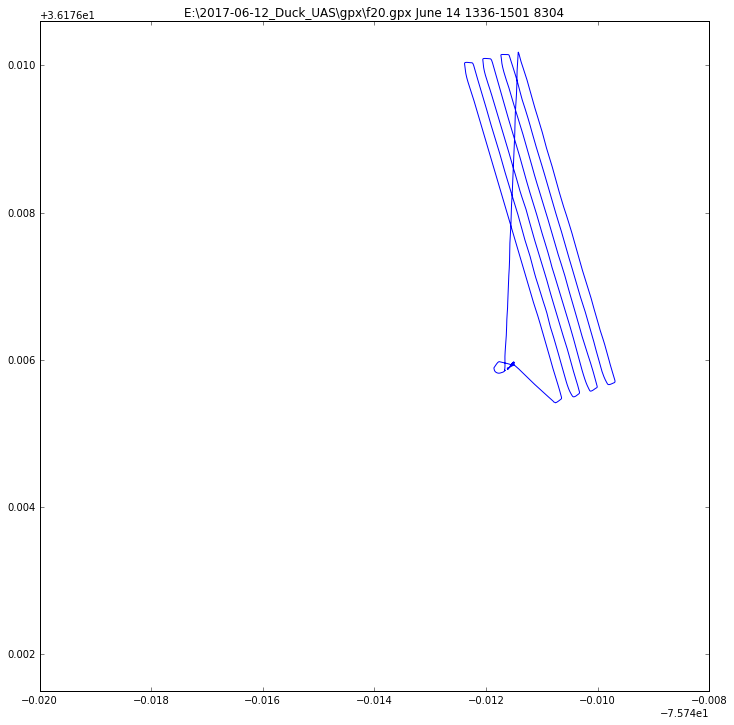

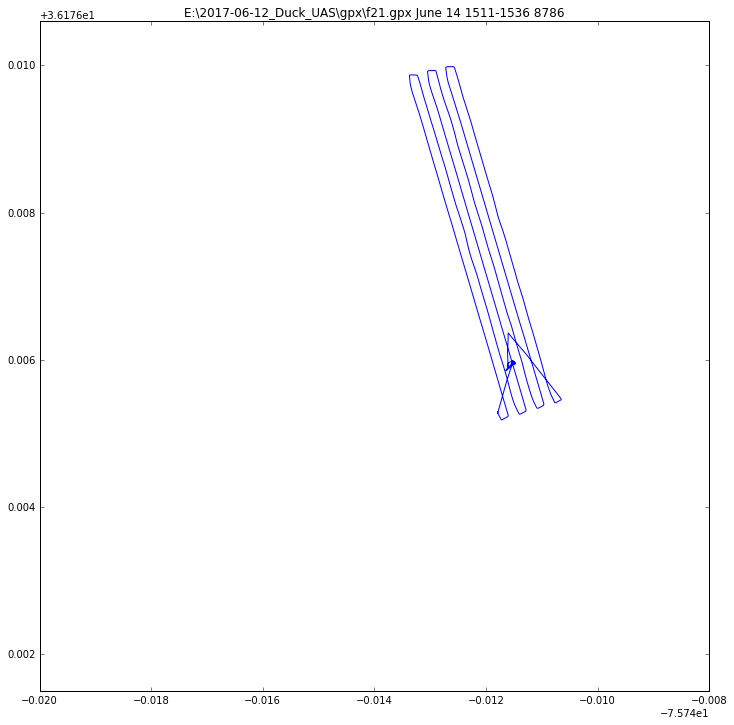

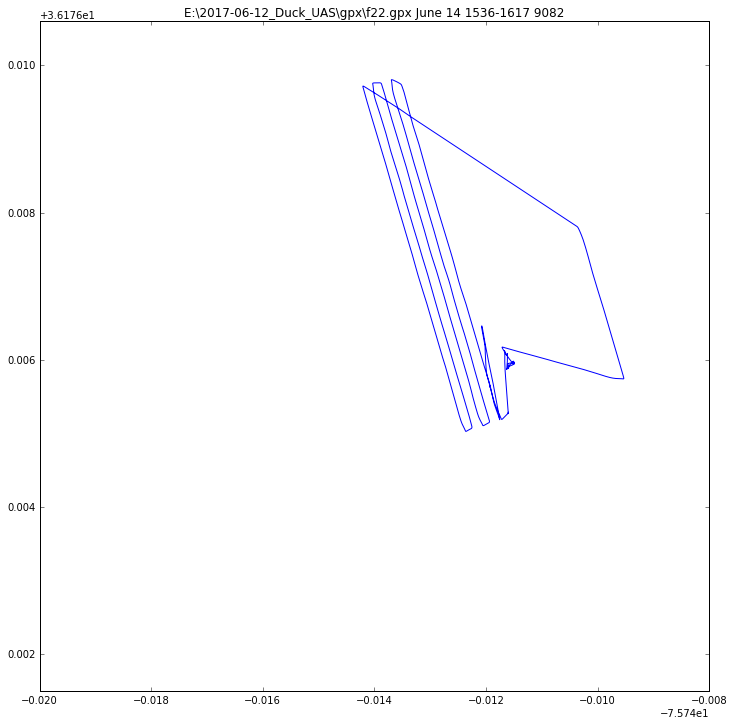

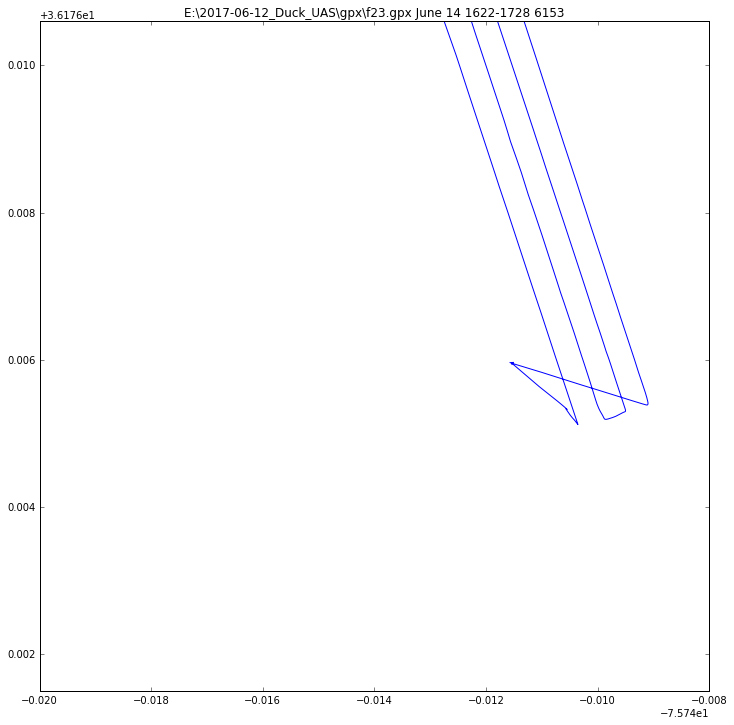

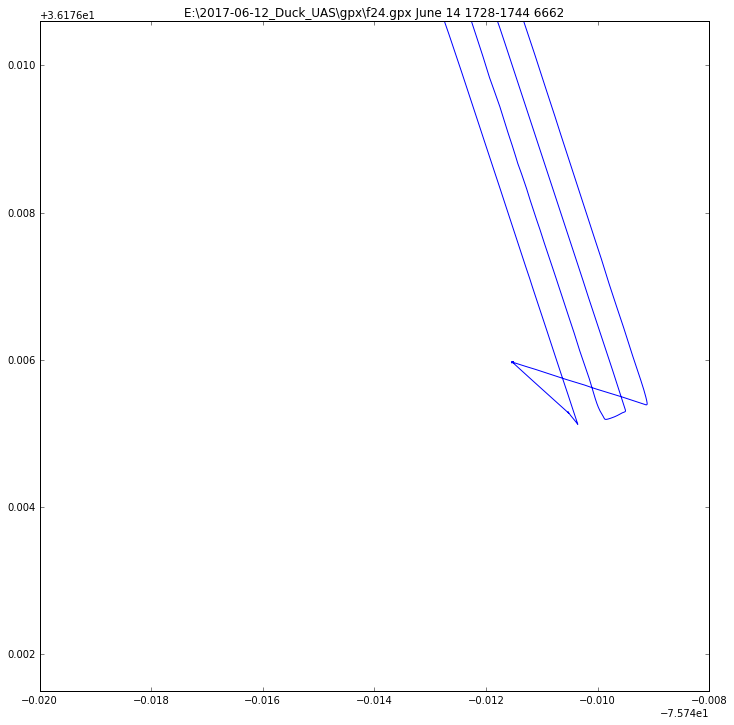

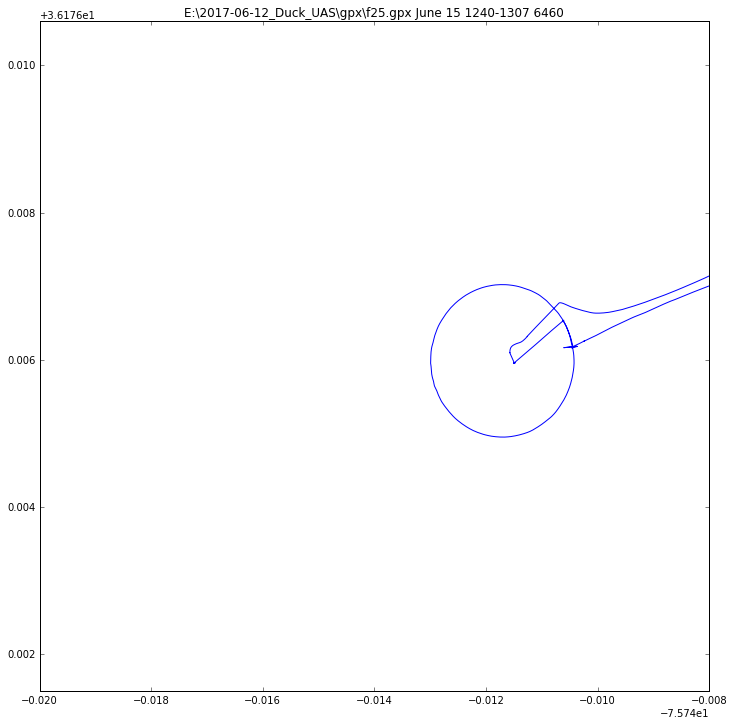

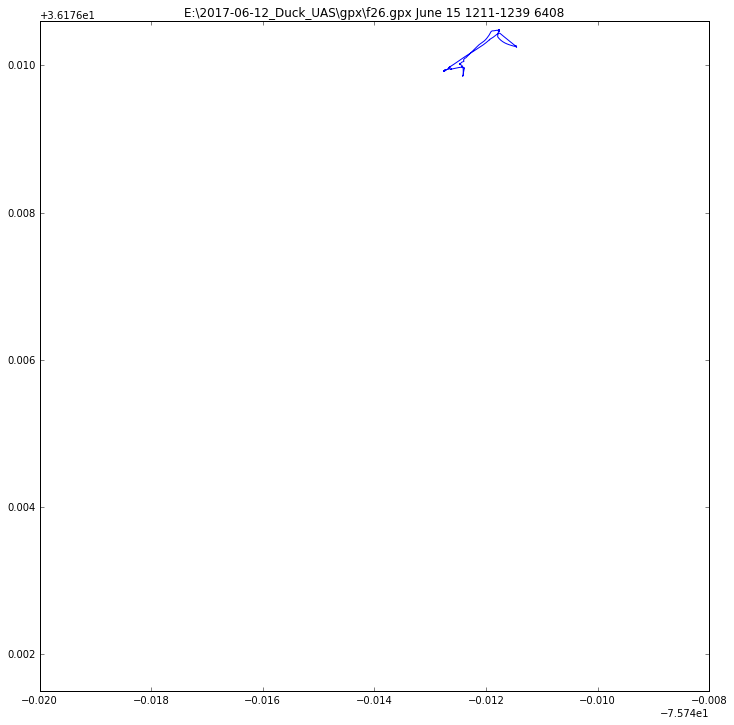

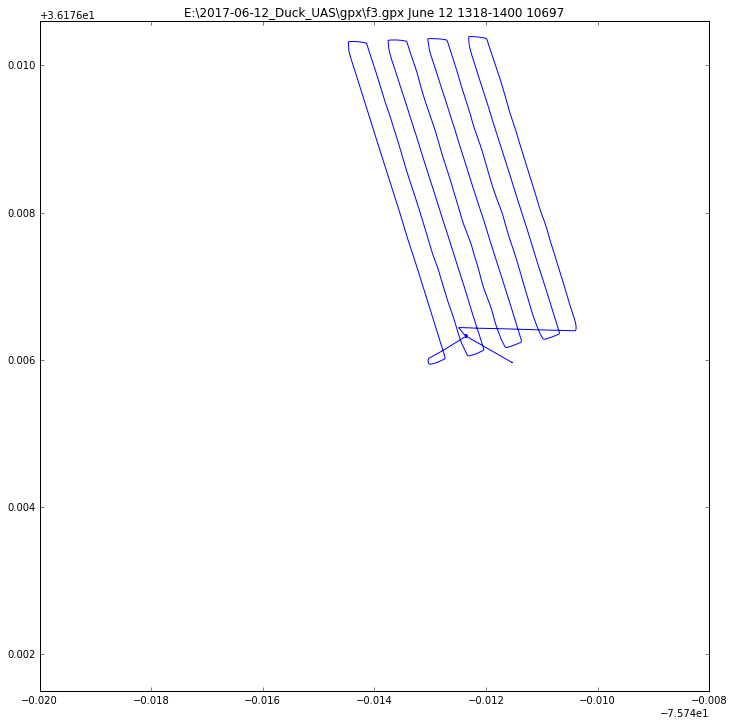

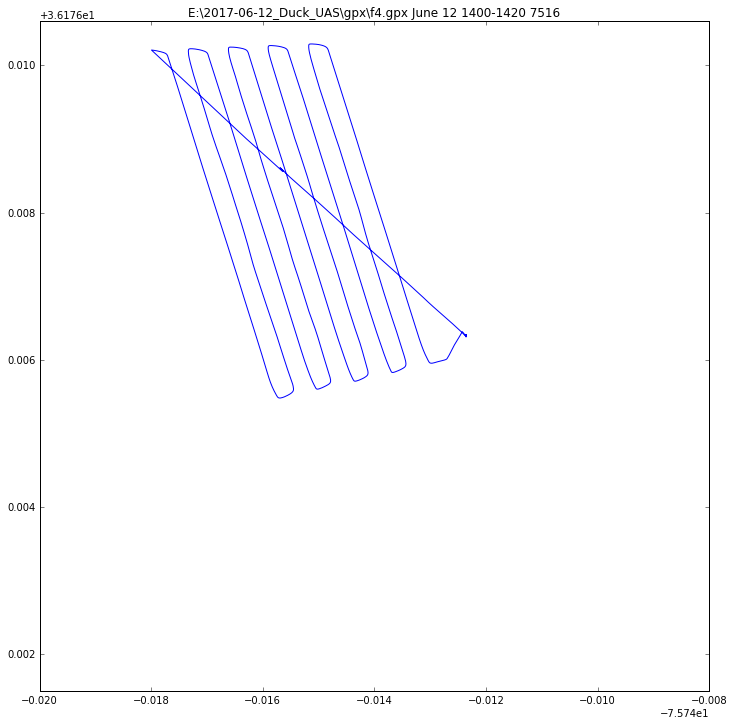

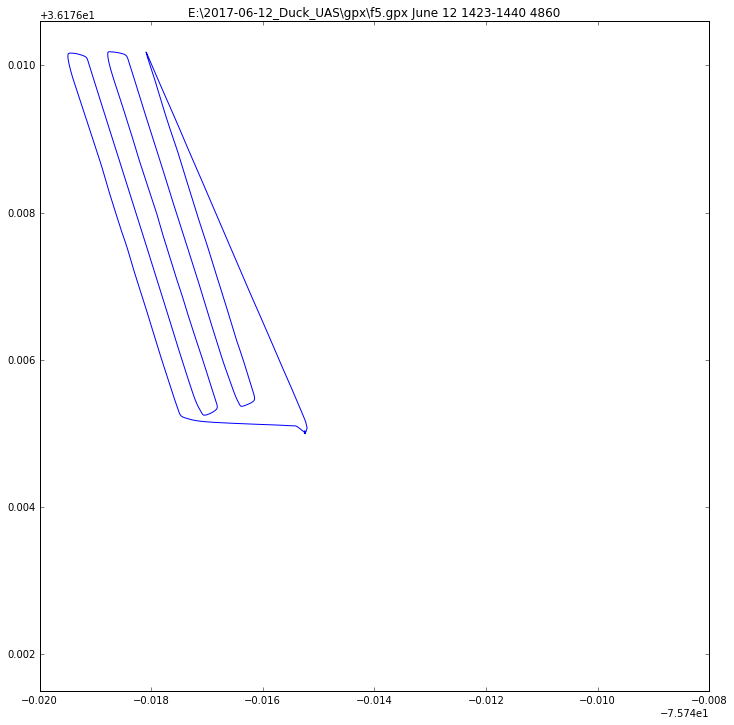

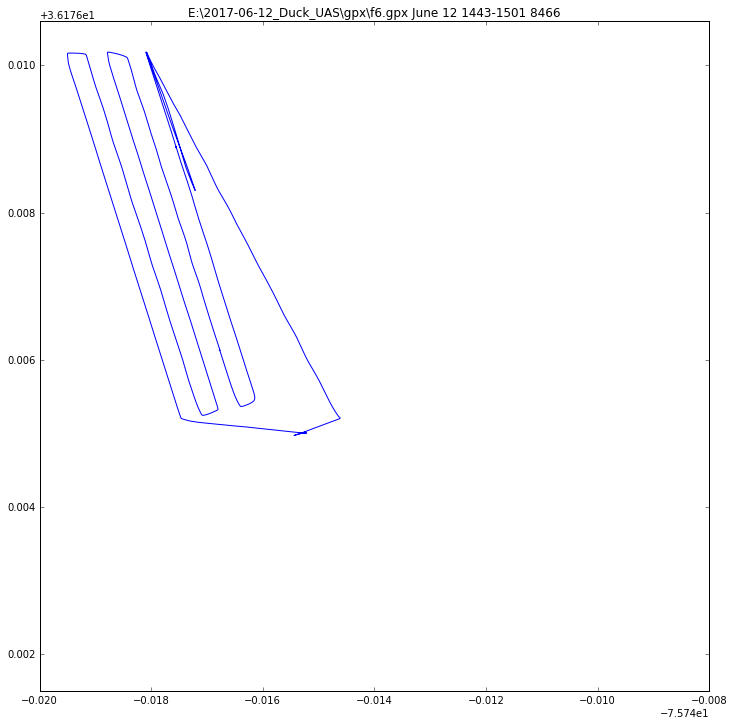

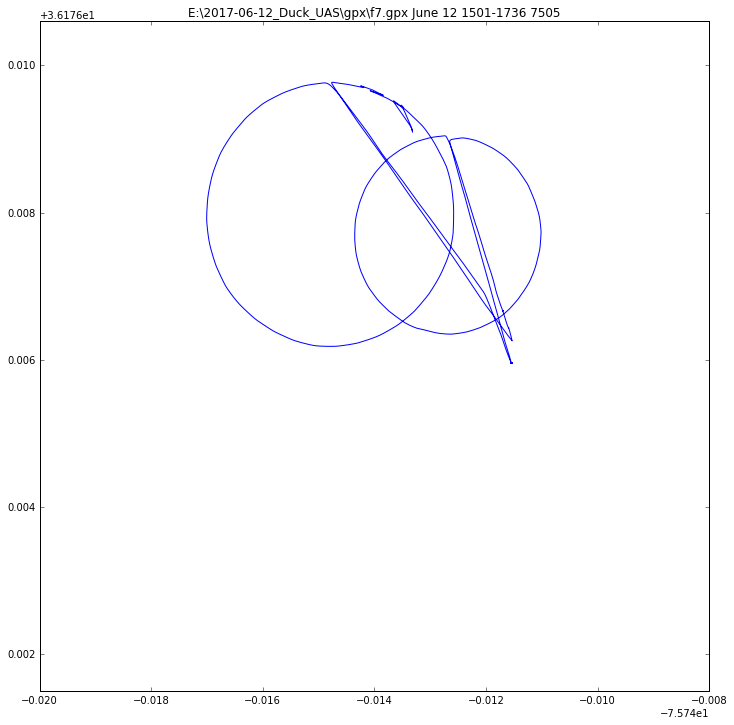

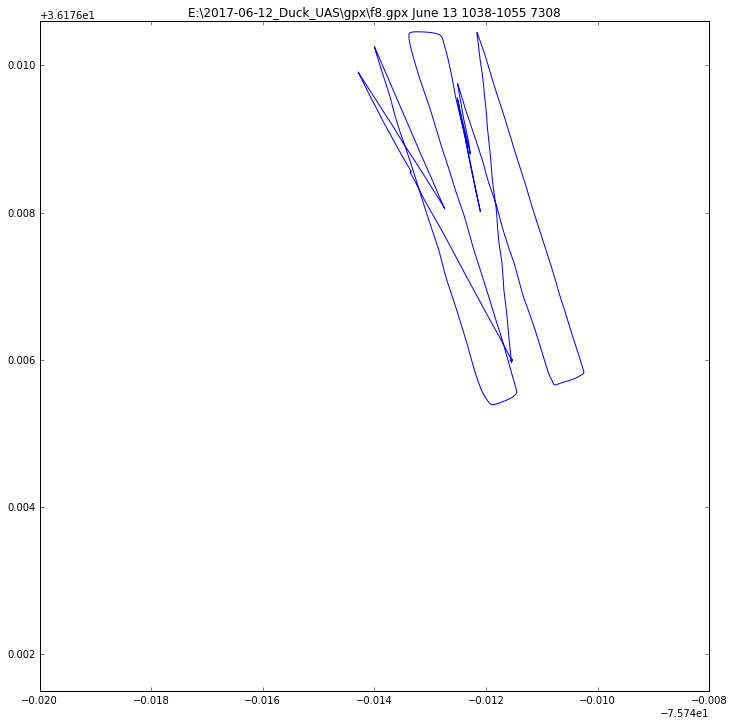

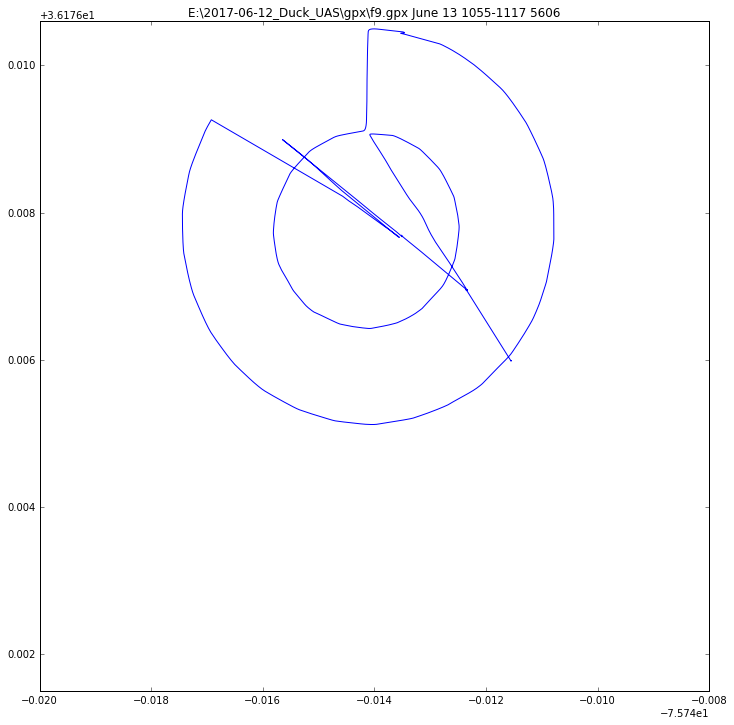

In [56]:
# get list of .gpx files the requested path (I have them in another folder at the same level)
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-12_logs'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-13_logs_a'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-13_logs_b'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-13_logs_c'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-13_logs_d'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-14_logs_a'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-14_logs_b'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-12_tlogs_tablet'
#path = 'E:\\2017-06-12_Duck_UAS\\2017-06-15_logs'
path = 'E:\\2017-06-12_Duck_UAS\\gpx'

glist=[os.path.join(path,g) for g in os.listdir(path) if ( g.endswith('.gpx') or g.endswith('.GPX'))]
print(glist)

#parse the gpx file and report start and end time
#TODO - Do something more useful with the time zone info
for f in glist:
    tree = etree.parse(f)
    elist = tree.xpath('./def:trk//def:trkpt//def:time',namespaces=namespace)
    fmt = '%Y-%m-%dT%H:%M:%S-04:00' #2017-05-04T14:14:12-04:00
    time = [dt.datetime.strptime(e.text, fmt) for e in elist]
    #print(f)
    #print(time[0],time[-1], np.shape(time))
    elist = tree.xpath('./def:trk//def:trkpt',namespaces=namespace)
    lonlat = [e.values() for e in elist]
    lonlat = np.array(lonlat,dtype="float")
    lat = lonlat[:,0]
    lon = lonlat[:,1]
    #print(lon[0],lat[0],np.shape(lon))
    
    # plot title
    ts=(f+' '+time[0].strftime('%B %d %H%M')+'-'+time[-1].strftime('%H%M')+' '+'{}'.format(len(lon)))

    plt.figure(figsize=(12,12))
    plt.plot(lon[1:],lat[1:])
    plt.title(ts)
    plt.xlim((-75.7600,-75.7480))
    plt.ylim((36.1775,36.1866))
    plt.savefig(f+'.png')

In [29]:
print(time[0])
ts=(f+' '+time[0].strftime('%B %d %H%M')+'-'+time[-1].strftime('%H%M')+' '+'{}'.format(len(lon)))
print(ts)
tss = '{}'.format(len(lon))
print(tss)

2017-06-12 13:01:13
E:\2017-06-12_Duck_UAS\2017-06-12_logs\solo9.gpx June 12 1301-1318 5548
5548
